In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import norm

## Análisis de la distancia euclidiana y similitud coseno de todos los microframes entre resúmenes y artículo original

In [103]:
def plot_density_cos_sim_euclidean(model_name, diff_type):
    df_a = pd.read_csv(rf'C:\Users\fuent\uchile\semestre-10\memoria\frameaxis\chilean-news\results\{diff_type}_table_{model_name.lower()}_summaries.tsv', sep='\t', dtype={'uri': str})
    df_b = pd.read_csv(rf'C:\Users\fuent\uchile\semestre-10\memoria\frameaxis\chilean-news\results\{diff_type}_table_body.tsv', sep='\t', dtype={'uri': str})
    
    # Extraer solo las columnas numéricas
    vec_cols = [col for col in df_a.columns if col != 'uri']

    # Verificar que los URIs están en el mismo orden y coinciden
    assert all(df_a['uri'] == df_b['uri']), "Las URIs no coinciden entre los DataFrames"

    # Convertir a matrices numpy
    A = df_a[vec_cols].to_numpy()
    B = df_b[vec_cols].to_numpy()

    # Calcular similitud coseno y distancia euclidiana
    cos_similarities = []
    euclidean_distances = []

    for a, b in zip(A, B):
        cos_sim = np.dot(a, b) / (norm(a) * norm(b))
        cos_similarities.append(cos_sim)
        euclidean_distances.append(norm(a - b))

    cos_similarities = np.array(cos_similarities)
    euclidean_distances = np.array(euclidean_distances)

    # Calcular media y desviación estándar
    cos_mean = np.mean(cos_similarities)
    cos_std = np.std(cos_similarities)

    euclidean_mean = np.mean(euclidean_distances)
    euclidean_std = np.std(euclidean_distances)

    # Curvas de densidad
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # KDE - Similitud coseno
    sns.kdeplot(cos_similarities, fill=True, ax=axs[0], color='tab:blue')
    axs[0].axvline(cos_mean, color='black', linestyle='--', label='$\mu$')
    axs[0].axvline(cos_mean + cos_std, color='tab:red', linestyle=':', label='+1 $\sigma$ y -1 $\sigma$')
    axs[0].axvline(cos_mean - cos_std, color='tab:red', linestyle=':')
    #axs[0].set_title('Densidad - Similitud Coseno')
    axs[0].set_xlabel('Similitud Coseno')
    axs[0].set_ylabel('Densidad')
    axs[0].legend()

    # KDE - Distancia euclidiana
    sns.kdeplot(euclidean_distances, fill=True, ax=axs[1], color='tab:orange')
    axs[1].axvline(euclidean_mean, color='black', linestyle='--', label='$\mu$')
    axs[1].axvline(euclidean_mean + euclidean_std, color='tab:red', linestyle=':', label='+1 $\sigma$ y -1 $\sigma$')
    axs[1].axvline(euclidean_mean - euclidean_std, color='tab:red', linestyle=':')
    #axs[1].set_title('Densidad - Distancia Euclidiana')
    axs[1].set_xlabel('Distancia Euclidiana')
    axs[1].set_ylabel('Densidad')
    axs[1].legend()

    # Boxplot - Similitud coseno
    #axs[1, 0].boxplot(cos_similarities, vert=False)
    #axs[1, 0].set_title('Boxplot - Similitud Coseno')

    # Boxplot - Distancia euclidiana
    #axs[1, 1].boxplot(euclidean_distances, vert=False)
    #axs[1, 1].set_title('Boxplot - Distancia Euclidiana')
    text = {'bias': 'el sesgo', 'intensity': 'la intensidad'}
    fig.suptitle(f'Densidades de Similitud Coseno y Distancia Euclidiana entre {text[diff_type]} de microframes en resúmenes de {model_name} y artículos originales')

    plt.tight_layout()
    plt.savefig(f"./plots/density/density-{model_name}-{diff_type}.pdf", format="pdf", bbox_inches="tight")

    plt.show()


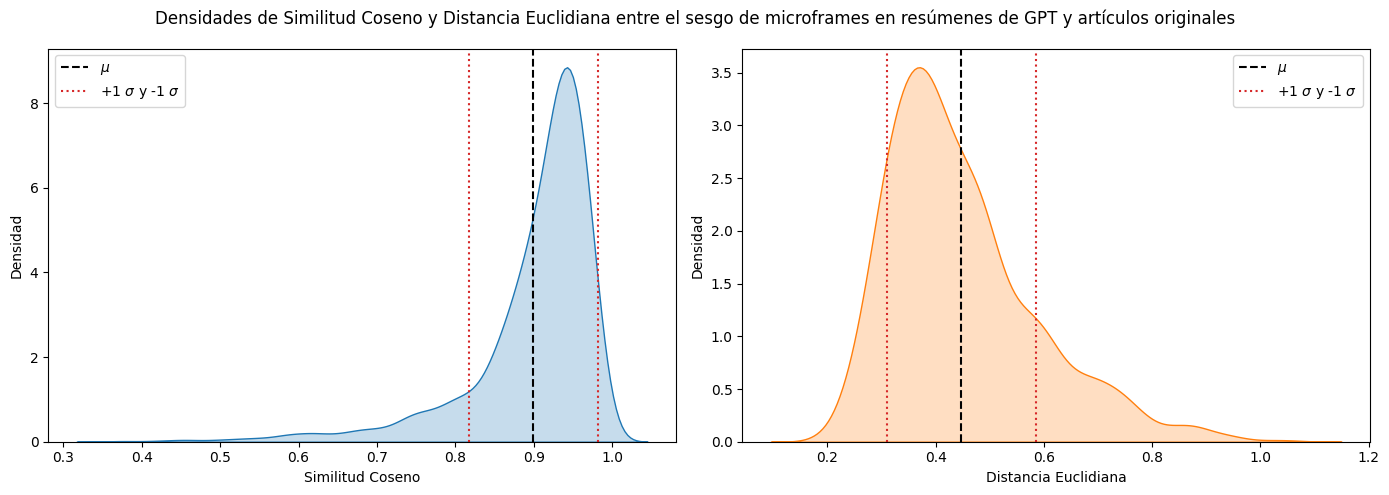

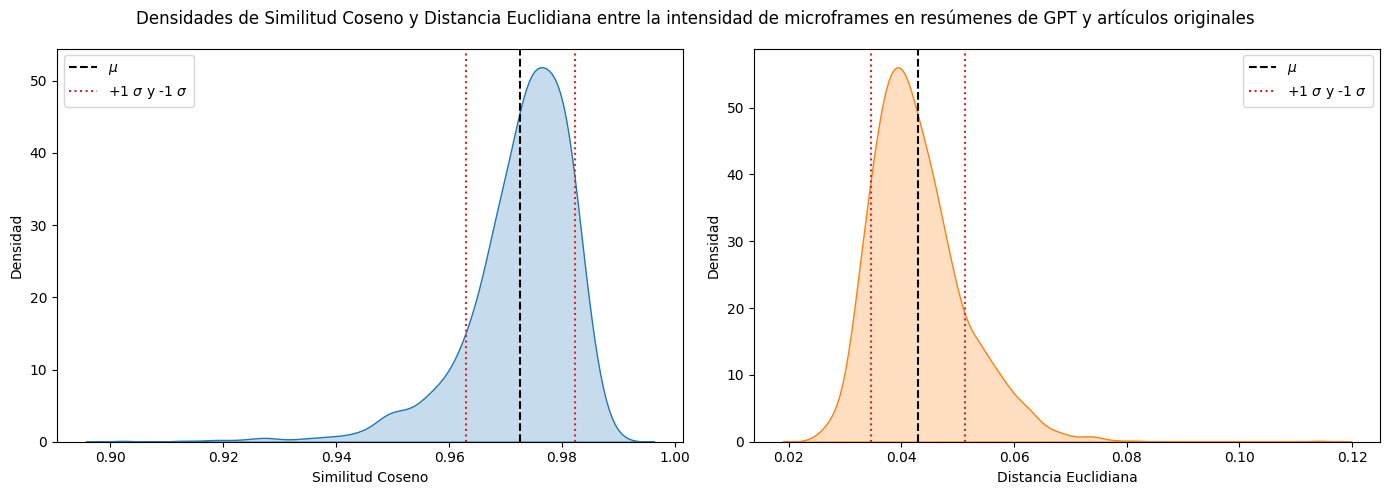

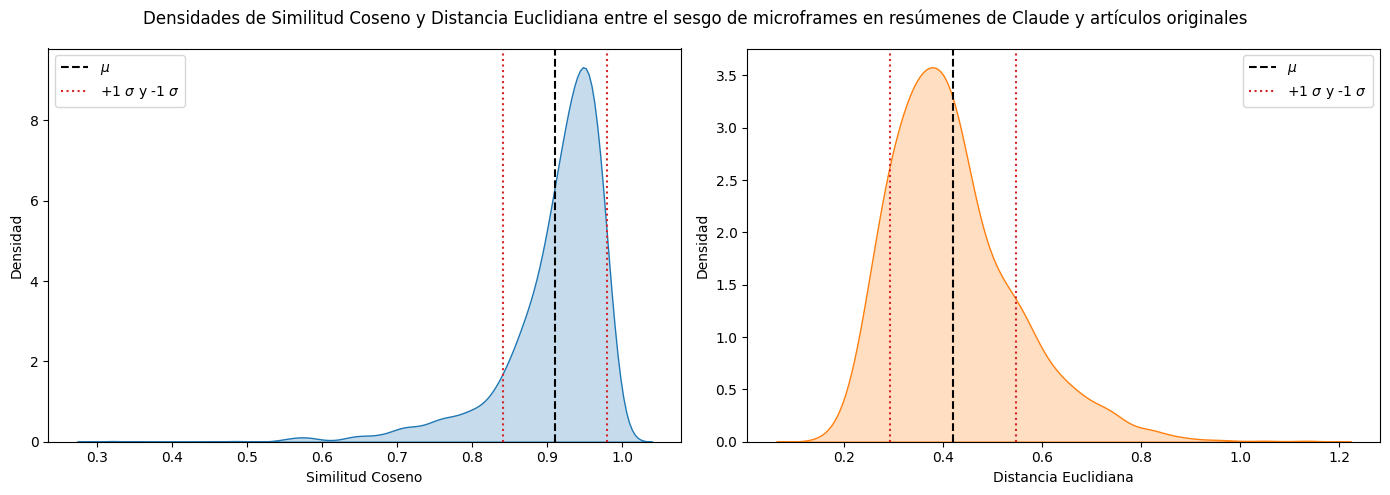

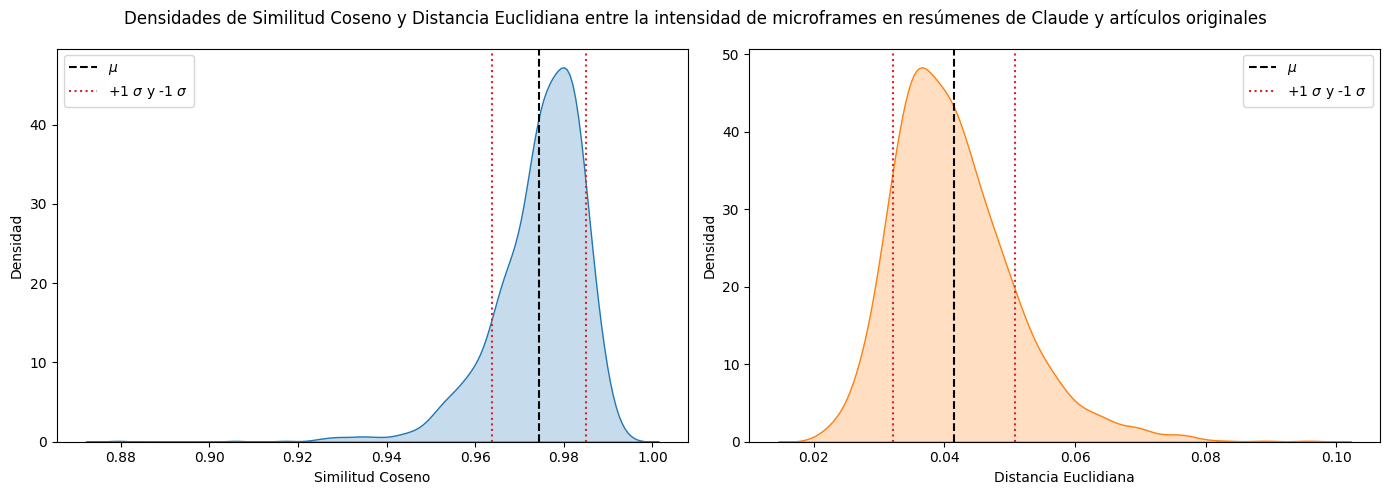

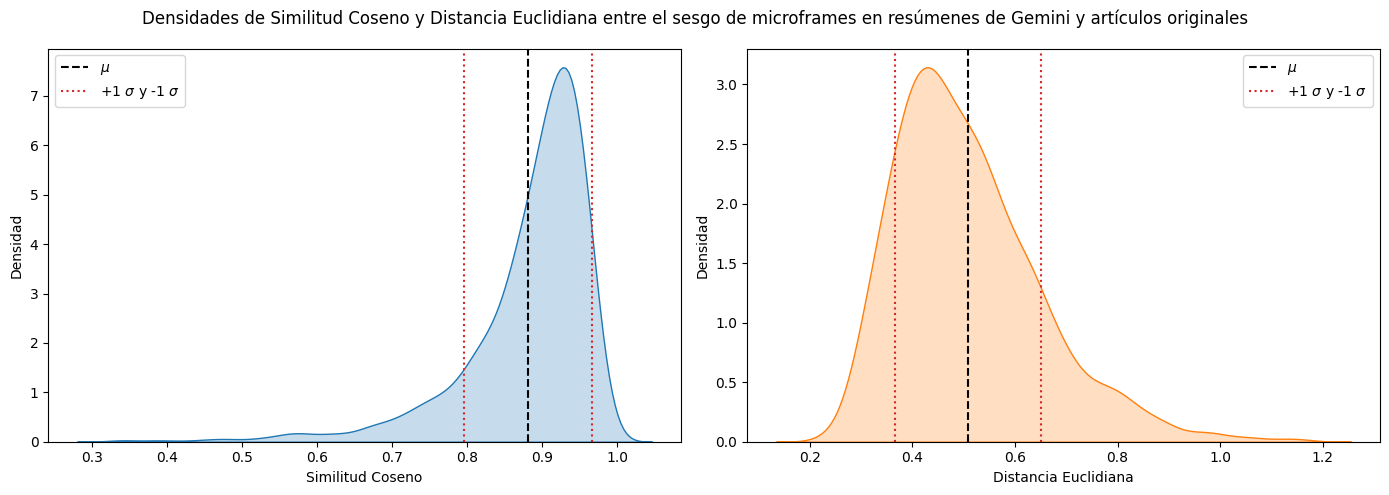

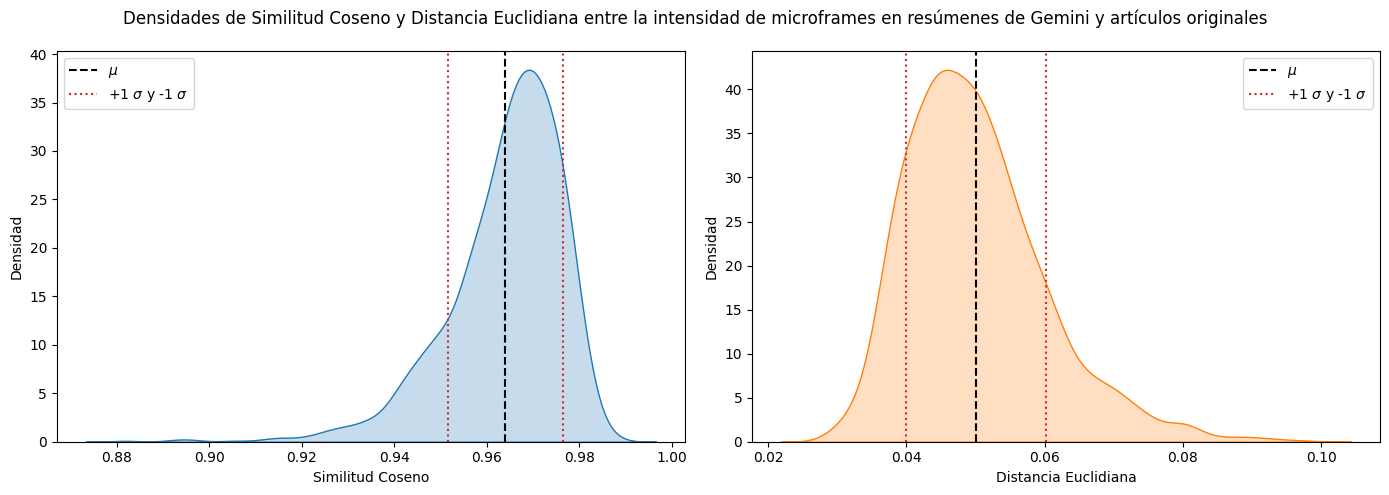

In [104]:
plot_density_cos_sim_euclidean('GPT', 'bias')
plot_density_cos_sim_euclidean('GPT', 'intensity')
plot_density_cos_sim_euclidean('Claude', 'bias')
plot_density_cos_sim_euclidean('Claude', 'intensity')
plot_density_cos_sim_euclidean('Gemini', 'bias')
plot_density_cos_sim_euclidean('Gemini', 'intensity')